In [1]:
from ulti.process_files import file_to_circuit_list, file_to_coupling_map
from qiskit.dagcircuit.dagnode import DAGOpNode

# convert circuit to dag
from qiskit.converters import circuit_to_dag

In [2]:
# Set up
circuit = "red_queen"

qc_list_filename = f"circuits/{circuit}/"
qc_list = file_to_circuit_list(qc_list_filename)


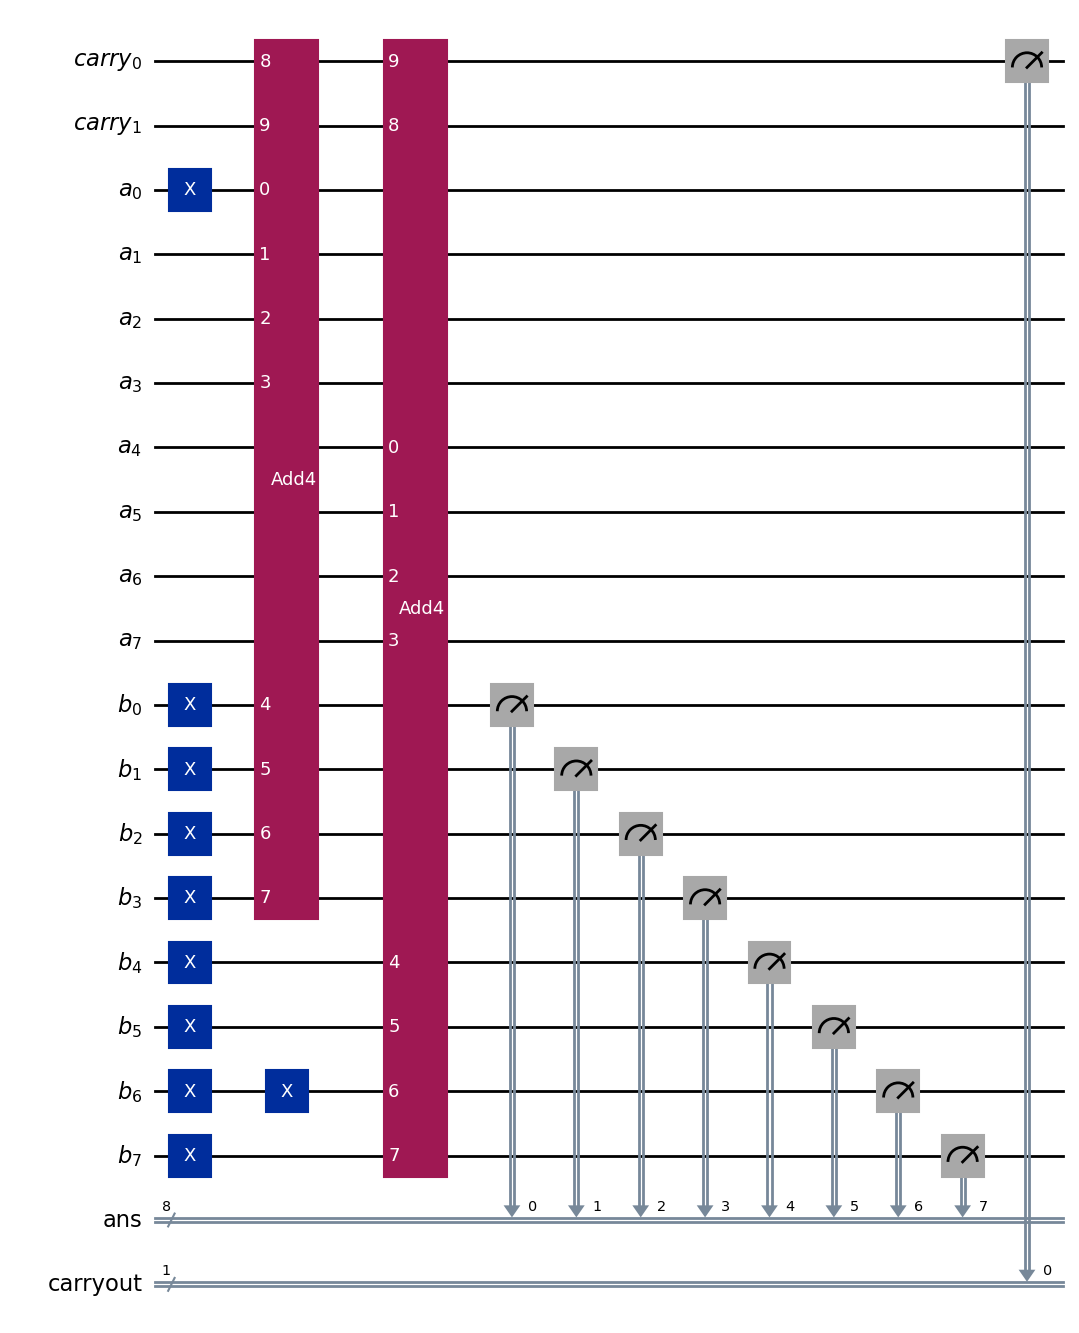

In [3]:
qc = qc_list[1]
qc.draw(output='mpl')

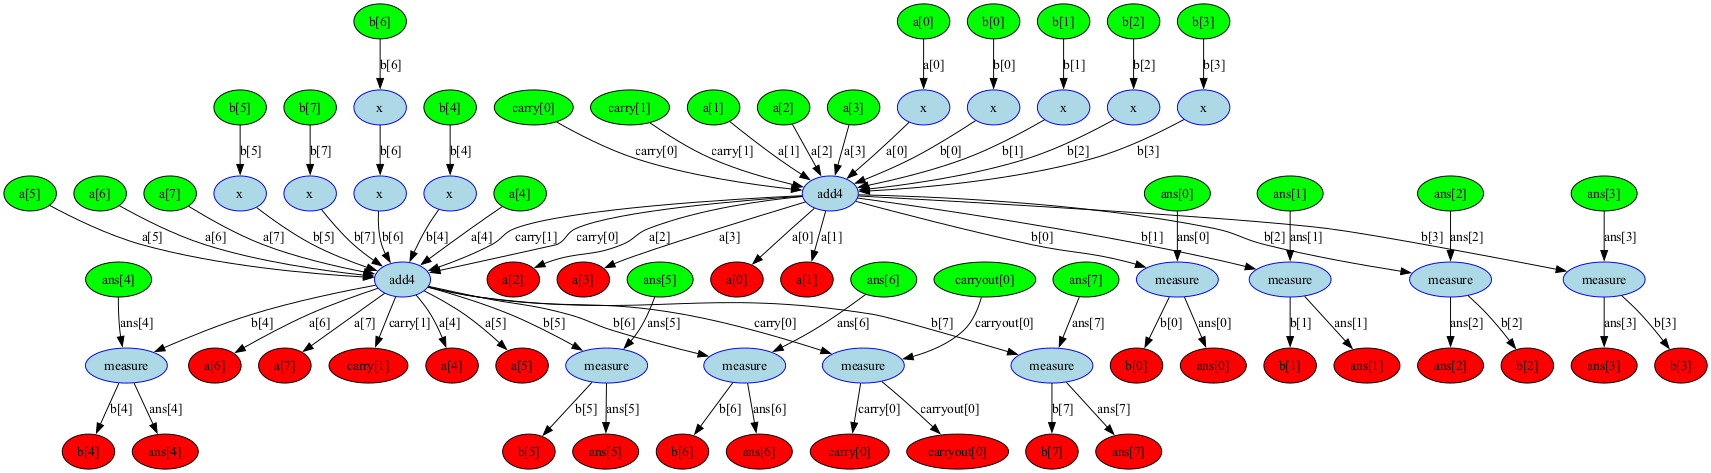

In [4]:
dag = circuit_to_dag(qc)
dag.draw()


In [5]:
print(len(dag.longest_path()))

6


In [6]:
def find_critical_paths(dag, percentage=10):
    longest_paths = []
    longest_length = 0

    def traverse(node, path):
        nonlocal longest_length
        current_path = path + [node]
        successors = list(dag.successors(node))
        if not successors:
            path_length = len(current_path)
            if path_length > longest_length:
                longest_length = path_length
                longest_paths.clear()
            if path_length >= longest_length * (percentage / 100.0):
                longest_paths.append(current_path)
        for successor in successors:
            traverse(successor, current_path)

    for node in dag.front_layer():
        traverse(node, [])

    return longest_paths


In [7]:
longest_paths = find_critical_paths(dag, 0)


In [8]:
flat_longest_paths = set([item for sublist in longest_paths for item in sublist])
list_filtered = [item for item in flat_longest_paths  if isinstance(item, DAGOpNode)]


In [9]:
len(list_filtered)

21

In [11]:
for gate in list_filtered:
    print(gate._node_id)

57
68
56
67
59
62
70
69
66
71
64
63
72
58
73
60
54
74
55
65
61
